In [ ]:
# Transformers installation
! pip install transformers
! pip install datasets

# automatic module update
%load_ext autoreload
%autoreload 2

# clonning all the modules
!git clone https://github.com/iambackend/thesis_code
%cd thesis_code

In [ ]:
from datasets.datasets import get_own_dataset

train_dataset, test_dataset, encode_dict = get_own_dataset('datasets/PURE_and_others.csv')

In [29]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, DistilBertTokenizerFast
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    evaluation_strategy='epoch',
    eval_steps=300,
)

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(encode_dict))

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,             # evaluation dataset
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

In [24]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, DistilBertTokenizerFast
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    evaluation_strategy='epoch',
    eval_steps=300,
)

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(encode_dict))

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,             # evaluation dataset
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Runtime,Samples Per Second
1,1.705500,1.588242,0.445545,0.074257,0.166667,0.102740,11.855900,8.519000


/Users/Ouser/Documents/Thesis/thesis_code/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=57, training_loss=1.7556158032333642, metrics={'train_runtime': 602.8131, 'train_samples_per_second': 0.095, 'total_flos': 55386657409824.0, 'epoch': 1.0})

## Results

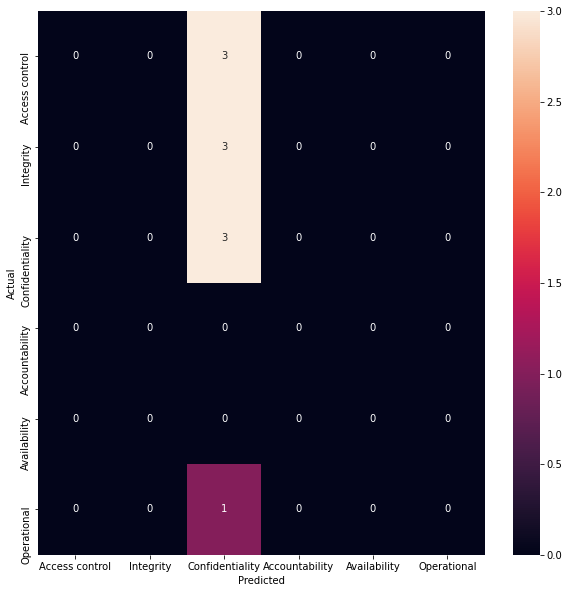

In [36]:
from src.utils import show_confusion_matrix

show_confusion_matrix(model, test_dataset, encode_dict)

In [ ]:
show_confusion_matrix(model, train_dataset, encode_dict)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs